<a href="https://colab.research.google.com/github/AlexeyTimoshin/Statistics/blob/main/AB_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [ ]:
days = 100
mu_control = 0
sigma_control = 1
n_control = 100
mu_experiment = 0
sigma_experiment = 1
n_experiment = 100

current_date = 1
user_data = pd.DataFrame()
daily_data = pd.DataFrame()
stat_result = pd.DataFrame()

In [ ]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    day_data_control = pd.DataFrame({'value' : daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    day_data_experiment = pd.DataFrame({'value' : daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)

    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date }))

    current_date_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})

    current_date_stat['date'] = current_date
    daily_data = daily_data.append(current_date_stat)
    current_date += 1

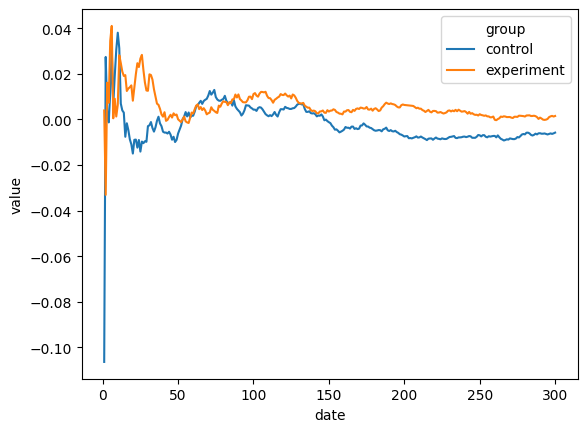

In [ ]:
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

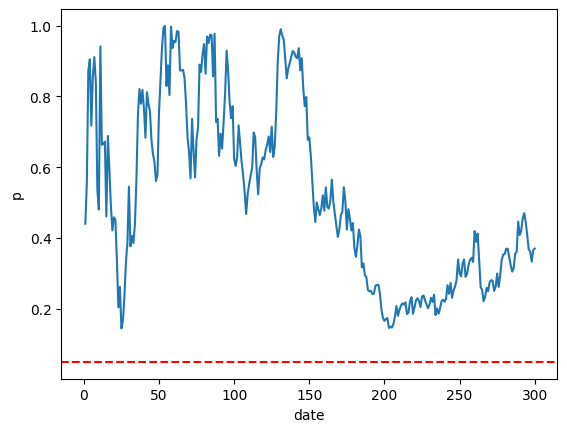

In [ ]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axline((0.0, 0.05), slope=0, ls='--', color='red')